In [1]:
import numpy as np
import pandas as pd

In [2]:
import os

image_folder = r"C:\Users\asus\Downloads\tumor"

for dirname, _, filenames in os.walk(image_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(1).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(10).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(100).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(11).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(12).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(13).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(14).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(15).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(16).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(17).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(18).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(19).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(2).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(20).jpg
C:\Users\asus\Downloads\tumor\Testing\glioma_tumor\image(21).jpg
C:\Users\asus\Downloads\tu

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense
from sklearn.metrics import accuracy_score

In [4]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle

In [5]:
!pip install opencv-python

In [6]:
!pip install tensorflow

In [7]:
import tensorflow as tf

Image Folder

In [8]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    image_folder = os.path.join(r"C:\Users\asus\Downloads\tumor\Training",i)
    for j in os.listdir(image_folder):
        img = cv2.imread(os.path.join(image_folder,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
        
for i in labels:
    image_folder = os.path.join(r"C:\Users\asus\Downloads\tumor\Testing",i)
    for j in os.listdir(image_folder):
        img = cv2.imread(os.path.join(image_folder,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)  
        
X_train = np.array(X_train)        
Y_train = np.array(Y_train)  

In [9]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [11]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

C:\Users\asus\anaconda3\New folder (2)\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.2982 - loss: 3.3402 - val_accuracy: 0.4388 - val_loss: 1.2519
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4771 - loss: 1.1957 - val_accuracy: 0.5646 - val_loss: 1.0146
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.5712 - loss: 0.9803 - val_accuracy: 0.6156 - val_loss: 0.9165
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.6386 - loss: 0.8384 - val_accuracy: 0.6837 - val_loss: 0.7864
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.7131 - loss: 0.6868 - val_accuracy: 0.6361 - val_loss: 0.8232
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.7240 - loss: 0.6494 - val_accuracy: 0.7109 - val_loss: 0.6345
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.7651 - loss: 0.5645 - val_accuracy: 0.7517 - val_loss: 0.5927
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.8184 - loss: 0.4660 - val_accuracy: 0.7721 - v

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

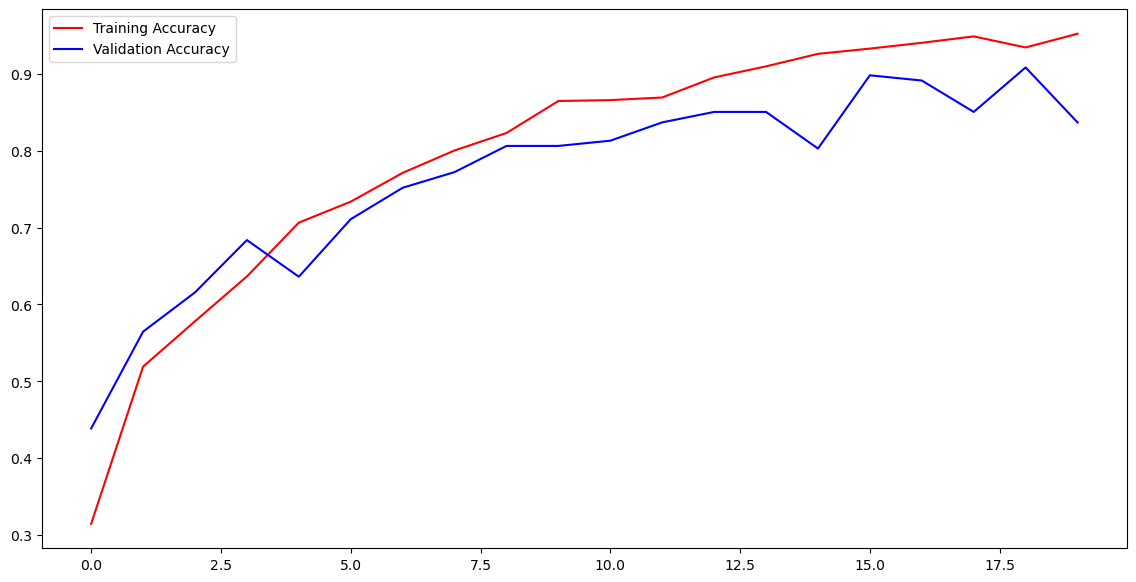

In [17]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

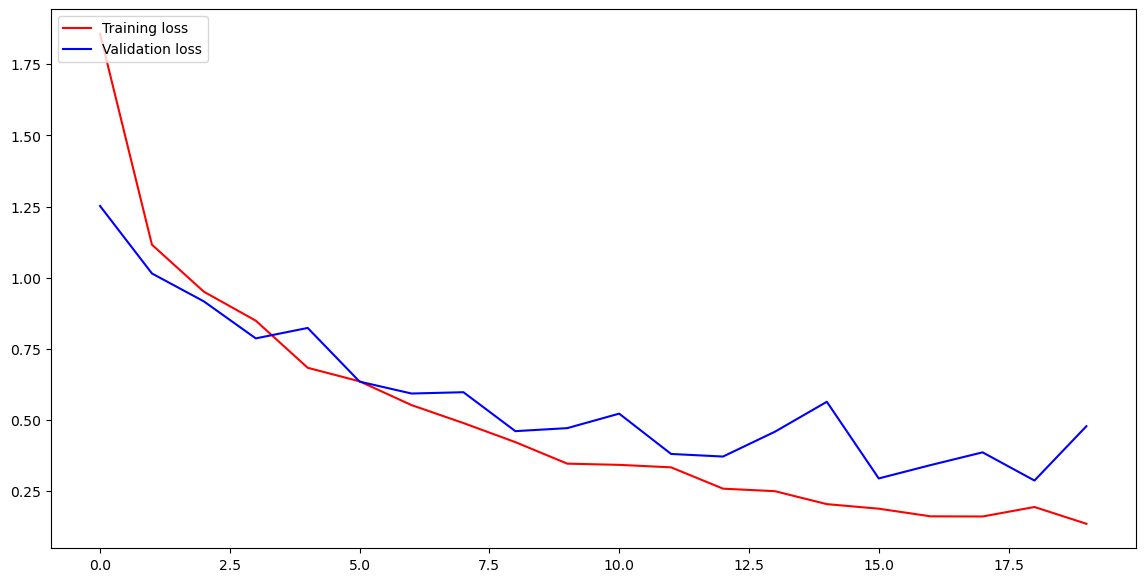

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [20]:
img = cv2.imread(r'C:\Users\asus\Downloads\extracted_files\Training\meningioma_tumor\m1(97).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [21]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [22]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


1